In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [2]:
file_path = "hepaa.csv"

data = pd.read_csv(file_path)

In [3]:
data.shape

(307, 20)

In [4]:
#data["y.BMI"] = data["y.BMI"].fillna(data["y.BMI"].median())
#data["x.HEP.C.RNA"] = data["x.HEP.C.RNA"].fillna(data["x.HEP.C.RNA"].mode()[0])
#data["x.Hep.B"] = data["x.Hep.B"].fillna(data["x.Hep.B"].mode()[0])
#data["y.Admission.INR"] = data["y.Admission.INR"].fillna(data["y.Admission.INR"].median())
#data["y.Adm.Platelet"] = data["y.Adm.Platelet"].fillna(data["y.Adm.Platelet"].median())
data = data.fillna(data.mode().iloc[0])

In [5]:
data.head()

,y.AGE,x.GEND,y.BMI,x.HEP.C.RNA,x.Hep.B,x.alcohol.use,x.Cirrhosis,y.Adm.Bili,y.Admission.INR,y.Adm.Cr,y.Adm.Na,y.Adm.ALT,y.Adm.AST,y.Adm.ALP,y.Adm.Platelet,x.DM,x.HTN,y.Adm.Alb,y.Adm.WBC,z.bad
0,26,F,20.4,P,N,SOC,N,3.0,1.3,0.48,137,1892,1443,270,111.0,N,N,3.0,3.0,N
1,61,M,28.0,N,P,SOC,Y,19.7,1.6,1.24,136,168,231,165,61.0,Y,N,1.8,4.8,Y
2,42,F,25.9,N,N,SOC,N,10.3,1.1,0.69,135,1101,555,1101,201.0,N,N,2.5,7.5,N
3,36,M,17.7,P,N,SOC,N,1.9,1.1,0.75,138,374,73,182,329.0,N,N,3.3,9.1,N
4,55,F,18.7,N,N,SOC,N,5.3,3.0,0.94,136,4940,5791,216,283.0,N,N,2.3,15.5,N


In [6]:
X = data.iloc[:, [0,1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18]].values
#X = data.iloc[:, [0,7,8,9,10,11,14]].values
y = data.iloc[:, -1].values

In [7]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])

X[:, 3] = lb.fit_transform(X[:, 3])

X[:, 4] = lb.fit_transform(X[:, 4])

X[:, 5] = lb.fit_transform(X[:, 5])

X[:, 13] = lb.fit_transform(X[:, 13])

X[:, 14] = lb.fit_transform(X[:, 14])


In [8]:
X[0]

array([26, 0, 20.4, 1, 0, 0, 3.0, 1.3, 0.48, 137, 1892, 270, 111.0, 0, 0,
       3.0, 3.0], dtype=object)

In [9]:
y = lb.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [12]:
#feature selection

fs = SelectKBest(score_func=mutual_info_classif, k=3)

fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
    if fs.scores_[i] > 0.08:
        print('Feature %d: %f' % (i, fs.scores_[i]))

#Features 5, 7, and 8
print('Selectrd features are:')


Feature 7: 0.116236
Feature 8: 0.181828
Selectrd features are:


In [13]:
# Creating new data that contains only the most effective features
new_data = data[['x.Cirrhosis', 'y.Admission.INR', 'y.Adm.Cr', 'z.bad']]

In [14]:
new_data.head(1)

,x.Cirrhosis,y.Admission.INR,y.Adm.Cr,z.bad
0,N,1.3,0.48,N


In [15]:
X = new_data.iloc[:, [0,1,2]].values
y = data.iloc[:, -1].values

In [16]:
lb = LabelEncoder()
X[:, 0] = lb.fit_transform(X[:, 0])
y = lb.fit_transform(y)
print(X[0])
print(y[0])

[0 1.3 0.48]
0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
logistic_classifier = LogisticRegression(random_state = 0)

logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred_lg = logistic_classifier.predict(X_test)

In [20]:
logistic_cm = confusion_matrix(y_test, y_pred_lg)
logistic_cm

array([[51,  0],
       [ 3,  8]])

In [21]:
print('Logistic Regression accuracy:' , accuracy_score(y_test, y_pred_lg))

Logistic Regression accuracy: 0.9516129032258065


In [22]:
cross_validate(logistic_classifier, X, y)

{'fit_time': array([0.00625777, 0.00369501, 0.00307512, 0.00311399, 0.00295591]),
 'score_time': array([0.00046396, 0.00024104, 0.00022197, 0.0002079 , 0.00020409]),
 'test_score': array([0.9516129 , 0.88709677, 0.95081967, 0.91803279, 0.91803279])}

In [23]:
print(classification_report(y_test, y_pred_lg, target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97        51
          No       1.00      0.73      0.84        11

    accuracy                           0.95        62
   macro avg       0.97      0.86      0.91        62
weighted avg       0.95      0.95      0.95        62



In [24]:
# Drawing ROC function
def draw_roc(n_classes, y_test, y_pred, plot_title):

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
        roc_auc[i] = auc(fpr[i], tpr[i])


    # Plot all ROC curves
    plt.figure(1)
    colors = cycle(['aqua', 'darkorange'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(plot_title)
        plt.legend(loc="lower right")

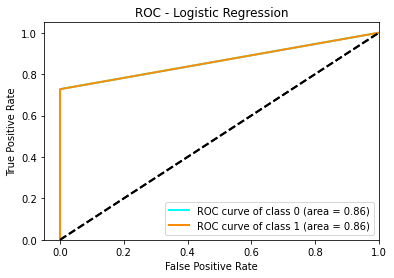

In [25]:
draw_roc(2, y_test, y_pred_lg, 'ROC - Logistic Regression')

In [26]:
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train_fs, y_train)

SVC(kernel='linear', random_state=0)

In [27]:
y_pred_svc = svc_classifier.predict(X_test_fs)

In [28]:
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_cm

array([[51,  0],
       [ 3,  8]])

In [29]:
print('Support Vector Classifier accuracy:' , accuracy_score(y_test, y_pred_svc))

Support Vector Classifier accuracy: 0.9516129032258065


In [30]:
cross_validate(svc_classifier, X, y)

{'fit_time': array([0.00135875, 0.00110912, 0.00083685, 0.00072503, 0.00076818]),
 'score_time': array([0.00040507, 0.00029898, 0.00028419, 0.00026608, 0.00026274]),
 'test_score': array([0.9516129 , 0.88709677, 0.95081967, 0.91803279, 0.91803279])}

In [31]:
print(classification_report(y_test, y_pred_svc, target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.94      1.00      0.97        51
          No       1.00      0.73      0.84        11

    accuracy                           0.95        62
   macro avg       0.97      0.86      0.91        62
weighted avg       0.95      0.95      0.95        62



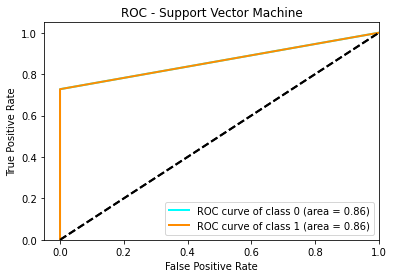

In [32]:
draw_roc(2, y_test, y_pred_svc, 'ROC - Support Vector Machine')

In [33]:
rf_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [34]:
y_pred_rf = rf_classifier.predict(X_test)

In [35]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cm

array([[49,  2],
       [ 1, 10]])

In [36]:
print('Random Forest accuracy:' , accuracy_score(y_test, y_pred_rf))

Random Forest accuracy: 0.9516129032258065


In [37]:
cross_validate(rf_classifier, X, y)

{'fit_time': array([0.05074501, 0.04718113, 0.04675698, 0.04675484, 0.04638004]),
 'score_time': array([0.0035181 , 0.00347805, 0.00345683, 0.00349212, 0.0034399 ]),
 'test_score': array([0.9516129 , 0.85483871, 0.91803279, 0.90163934, 0.93442623])}

In [38]:
print(classification_report(y_test, y_pred_rf, target_names=['Yes', 'No']))

              precision    recall  f1-score   support

         Yes       0.98      0.96      0.97        51
          No       0.83      0.91      0.87        11

    accuracy                           0.95        62
   macro avg       0.91      0.93      0.92        62
weighted avg       0.95      0.95      0.95        62



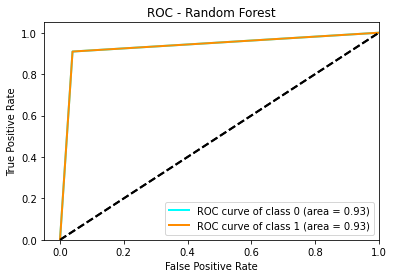

In [39]:
draw_roc(2, y_test, y_pred_rf, 'ROC - Random Forest')